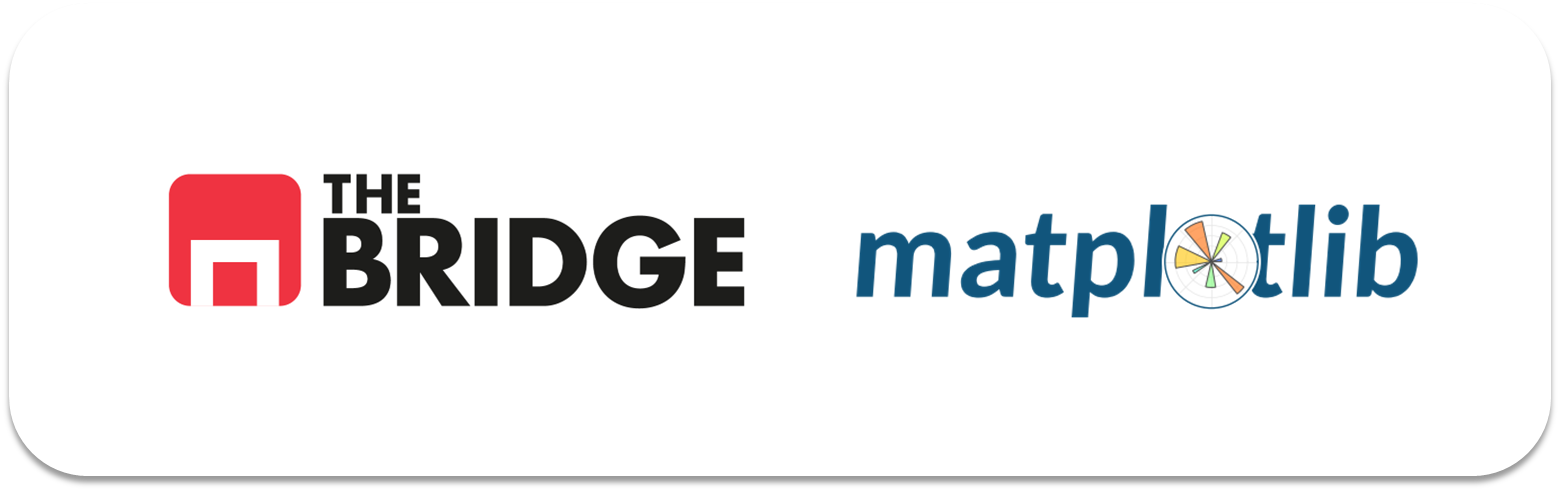

## PRACTICA OBLIGATORIA: **Visualización Básica**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Ejercicio 1

#### #1.1

- Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv".  
- Muestra parte de su contenido y su descripción.  
- Deshazte de las filas con nulos.

In [4]:
cities = pd.read_csv("./data/california_cities.csv")
cities

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


In [5]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [6]:
cities.isnull().sum().sum()

np.int64(81)

In [7]:
cities.dropna(axis = "index", inplace = True)
cities.isnull().sum().sum()

np.int64(0)

#### #1.2  

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro.  

Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)  

2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand ITC", tamaño 18, color azul acero o "steelblue")
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

In [8]:
cities.columns

Index(['Unnamed: 0', 'city', 'latd', 'longd', 'elevation_m', 'elevation_ft',
       'population_total', 'area_total_sq_mi', 'area_land_sq_mi',
       'area_water_sq_mi', 'area_total_km2', 'area_land_km2', 'area_water_km2',
       'area_water_percent'],
      dtype='object')

Text(0.5, 1.0, '5 Ciudades Más Pobladas de California')

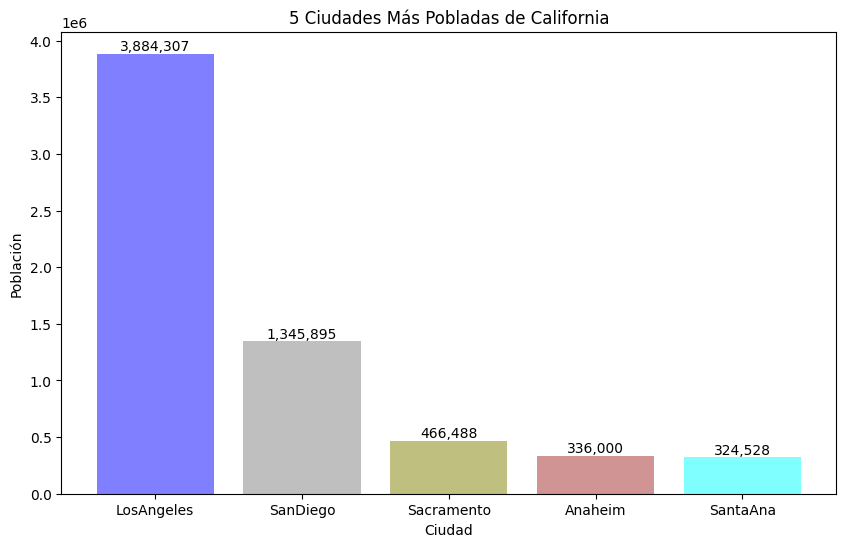

In [11]:
#1. Las ciudades más pobladas
# Obtener las 5 ciudades más pobladas
top5 = cities.nlargest(5, "population_total")

# Crear la figura
fig, ax = plt.subplots(figsize=(10,6))

# Colores
colores = ["blue", "gray", "olive", "brown", "cyan"]

# Crear el gráfico de barras
barras = ax.bar(top5["city"], top5["population_total"],
                color = colores, alpha = 0.5)

# Añadir los números de población sobre cada barra
for i, (ciudad, poblacion) in enumerate(zip(top5['city'], top5['population_total'])):
    ax.text(i, poblacion, f'{int(poblacion):,}', 
            ha='center', va='bottom', fontsize=10)

# Etiquetas y título
ax.set_xlabel('Ciudad')
ax.set_ylabel('Población')
ax.set_title('5 Ciudades Más Pobladas de California')



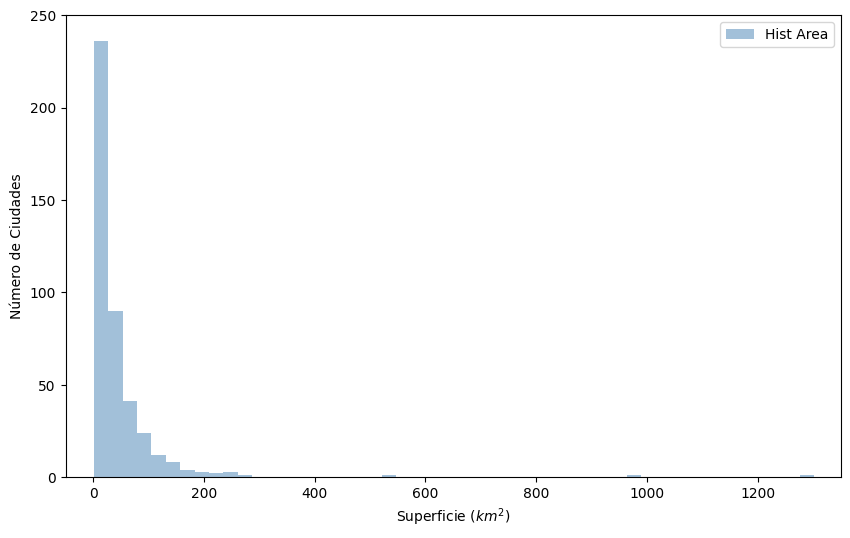

In [ ]:
#2. 2. Histograma del área total ocupada por las ciudades. (50 bins, 
# fuente = "Bradley Hand ITC", tamaño 18, color azul acero o "steelblue")

fig = plt.figure(figsize= (10,6))
ax = plt.axes()
data = cities['area_total_km2']
plt.hist(data, bins = 50, alpha = 0.5, color = "steelblue", label = "Hist Area")
plt.legend(loc = "upper right", ncol= 2)
plt.xlabel("Superficie ($km^2$)")
plt.ylabel("Número de Ciudades")
plt.xlim(-50,1350)
plt.ylim(0,250);

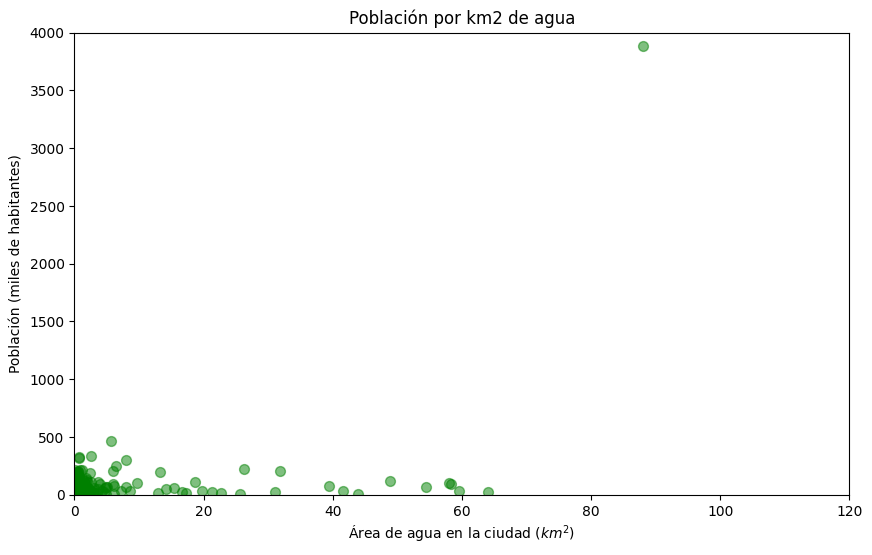

In [55]:
#3. El scatter de área de agua de un ciudad con su poblacion.
fig = plt.figure(figsize= (10,6))
ax = plt.axes()

plt.title("Población por km2 de agua")
plt.xlabel("Área de agua en la ciudad ($km^2$)")
plt.ylabel("Población (miles de habitantes)")
plt.xlim(0,120)
plt.ylim(0,4000)

# Scatter plot
# s debe ser un tamaño fijo o basado en otra variable (NO en area_water_km2)
plt.scatter(cities["area_water_km2"], cities["population_total"]/1000, 
            color = "green", s = 50, alpha = 0.5)

# Flecha (a dos outliers diferentes)
# Outlier 1: mayor área de agua
# ????


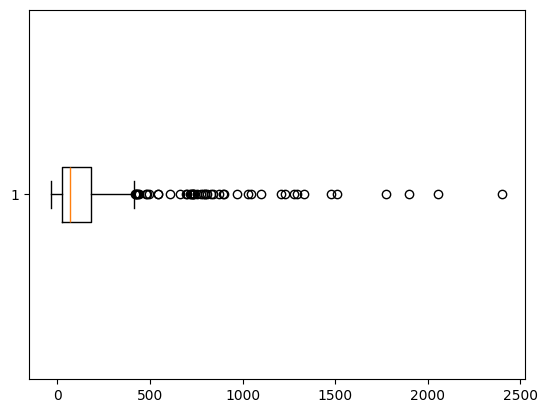

In [ ]:
#4. El boxplot de la altura de las ciudades.
plt.boxplot(cities["elevation_m"], vert = False);

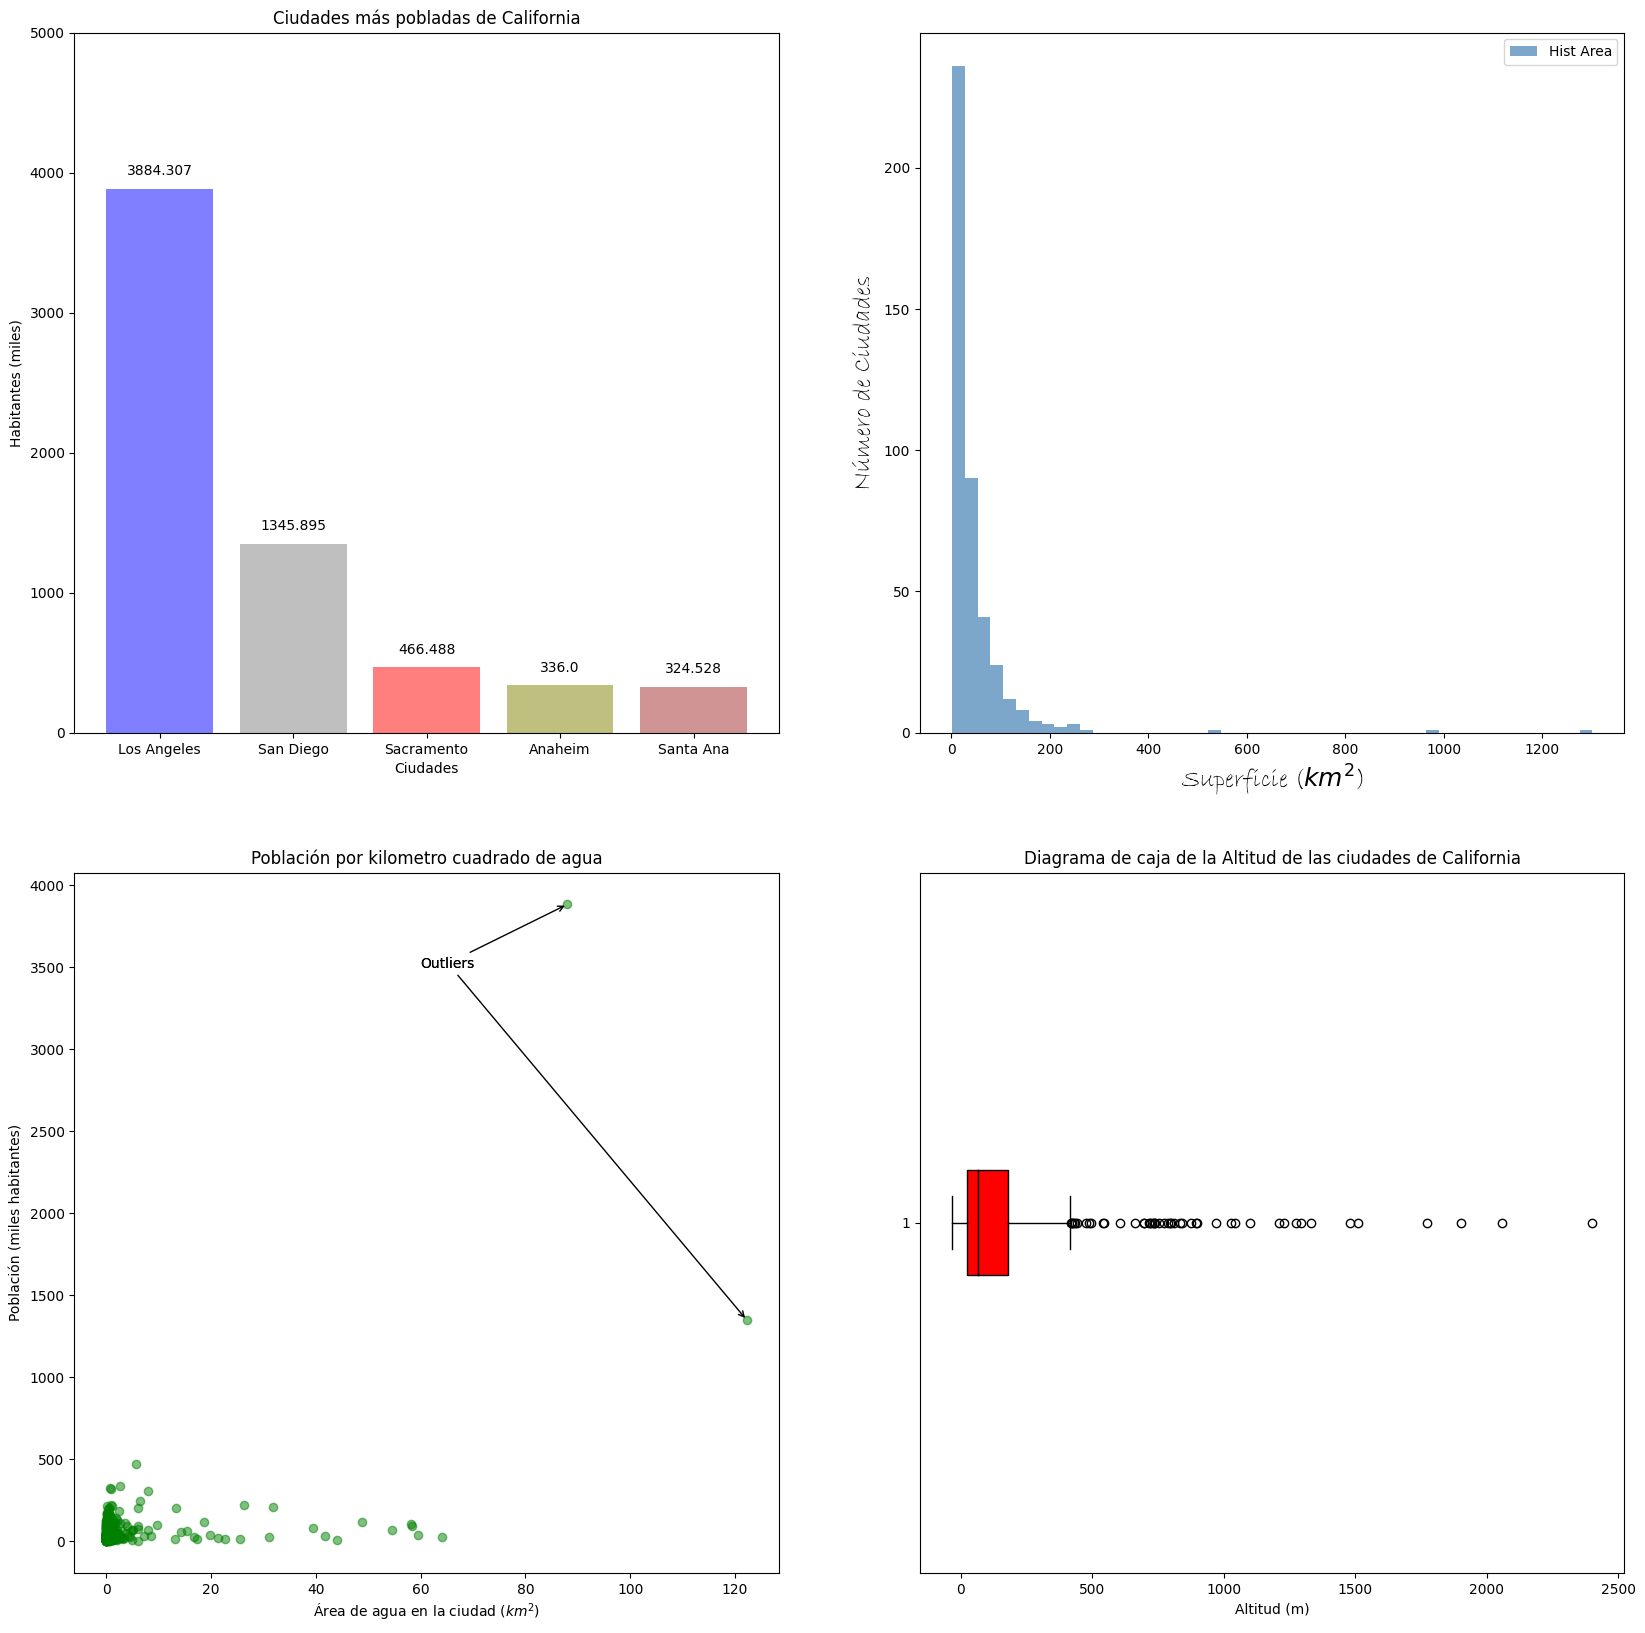

#### #1.3

Graba la figura en un archivo .png y sube el archivo a tu repositorio personal junto con el notebook.